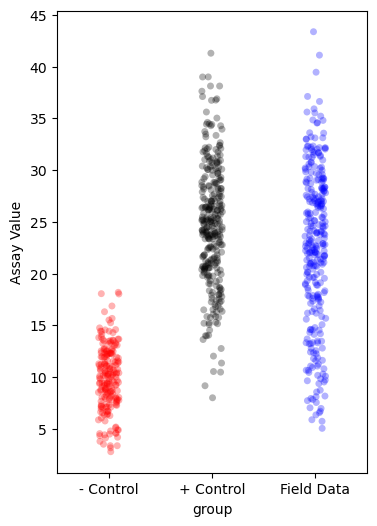

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

neg = pd.read_csv("HW4_Q3_neg.csv", header=None, names=['assay'])
pos = pd.read_csv("HW4_Q3_pos.csv", header=None, names=['assay'])
field = pd.read_csv("HW4_Q3_data.csv", header=None, names=['assay'])

neg['group'] = '- Control'
pos['group'] = '+ Control'
field['group'] = 'Field Data'

data = pd.concat([neg, pos, field], ignore_index=True)

plt.figure(figsize=(4, 6))
sns.stripplot(x='group', y='assay', data=data, jitter=True, alpha=0.3, hue='group',palette={'- Control':'red','+ Control':'black','Field Data':'blue'},dodge=False,legend=False)
plt.ylabel("Assay Value")
plt.show()


vals = pd.concat([neg['assay'], pos['assay'], field['assay']])

datamax = vals.max()
datamin = vals.min()


In [65]:
def se(c):
    TP = np.sum(pos['assay'] > c)
    FN = np.sum(pos['assay'] <= c)
    return TP / (TP + FN)

def sp(c):
    TN = np.sum(neg['assay'] <= c)
    FP = np.sum(neg['assay'] > c)
    return TN / (TN + FP)

def phi_hat(c):
    return np.mean(field['assay'] > c)

def thetaest(c):
    sensitivity = se(c)   
    specificity = sp(c)  
    return (phi_hat(c) + specificity - 1) / (sensitivity + specificity - 1)

#Not sure this is the best way to do this:
cvalues = np.linspace(datamin,datamax,2000)
Youdenvals = [se(c) + sp(c) - 1 for c in cvalues]
Youdenindex = np.argmax(Youdenvals)
cYouden = cvalues[Youdenindex]
print(cYouden)


14.768810092404724


C:\Users\nogtr\AppData\Local\Temp\ipykernel_49948\3010853814.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return (phi_hat(c) + specificity - 1) / (sensitivity + specificity - 1)
C:\Users\nogtr\AppData\Local\Temp\ipykernel_49948\3010853814.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return (phi_hat(c) + specificity - 1) / (sensitivity + specificity - 1)


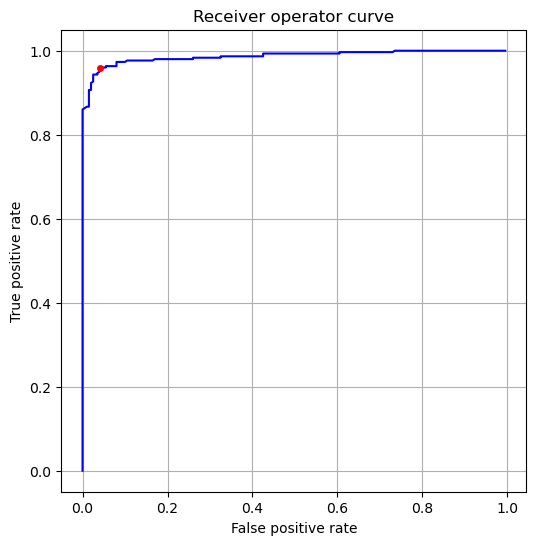

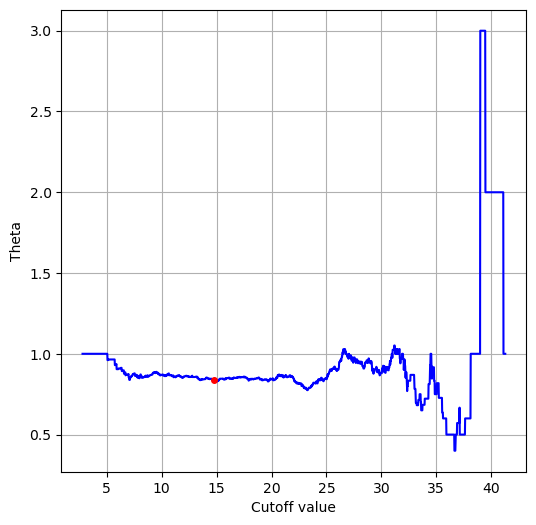

In [68]:
cvalues = np.linspace(datamin,datamax,2000)
tpr = [se(c) for c in cvalues]
fpr = [1 - sp(c) for c in cvalues]
theta = [thetaest(c) for c in cvalues]

p1 = se(cYouden)
p2 = 1-sp(cYouden)


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue')
plt.plot(p2,p1,'ro',markersize=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operator curve")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.plot(cvalues, theta, color='blue')
plt.plot(cYouden,thetaest(cYouden),'ro',markersize=4)
plt.xlabel("Cutoff value")
plt.ylabel("Theta")
plt.grid(True)
plt.show()

In [62]:
datamax

43.37168179243732

In [63]:
datamin

2.7917381953009386